<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [ ]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

## Load the dataframe


Load the data


In [ ]:
import pandas as pd
import requests
from io import StringIO

# for target Y use only Class
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

response = requests.get(URL1)
data = pd.read_csv(StringIO(response.text))

In [ ]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
data.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object

In [ ]:
data.groupby(data['Class']).head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
12,13,2015-02-11,Falcon 9,570.000000,ES-L1,CCAFS SLC 40,True Ocean,1,True,False,True,NaN,1.0,0,B1013,-80.577366,28.561857,1
16,17,2015-12-22,Falcon 9,2034.000000,LEO,CCAFS SLC 40,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,1.0,0,B1019,-80.577366,28.561857,1
19,20,2016-04-08,Falcon 9,3136.000000,ISS,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,1,B1021,-80.577366,28.561857,1


In [ ]:
data['LaunchSite'].unique()

array(['CCAFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], dtype=object)

In [ ]:
pivot_table = pd.pivot_table(data, index='LaunchSite', columns='Class', aggfunc='size', fill_value=0)
pivot_table

Class,0,1
LaunchSite,,
CCAFS SLC 40,22,33
KSC LC 39A,5,17
VAFB SLC 4E,3,10


In [ ]:
# Use all the features from Dataset
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

response = requests.get(URL2)
X = pd.read_csv(StringIO(response.text))

In [ ]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
X.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,0.011111,0.011111,0.300000,0.011111,0.233333,...,0.033333,0.044444,0.033333,0.011111,0.222222,0.777778,0.588889,0.411111,0.211111,0.788889
std,26.124701,4694.671720,1.213172,1.595288,1.710254,0.105409,0.105409,0.460825,0.105409,0.425322,...,0.180511,0.207235,0.180511,0.105409,0.418069,0.418069,0.494792,0.494792,0.410383,0.410383
min,1.000000,350.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

In [ ]:
X.dtypes

FlightNumber     float64
PayloadMass      float64
Flights          float64
Block            float64
ReusedCount      float64
                  ...   
GridFins_True    float64
Reused_False     float64
Reused_True      float64
Legs_False       float64
Legs_True        float64
Length: 83, dtype: object

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [ ]:
Y = data['Class'].to_numpy()

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [ ]:
# students get this
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


we can see we only have 18 test samples.


In [ ]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [ ]:
lr=LogisticRegression()
grid_search = GridSearchCV(lr, parameters, cv=10)
logreg_cv = grid_search.fit(X_train, Y_train)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [ ]:
logreg_cv.score(X_test, Y_test)

0.8333333333333334

Lets look at the confusion matrix:


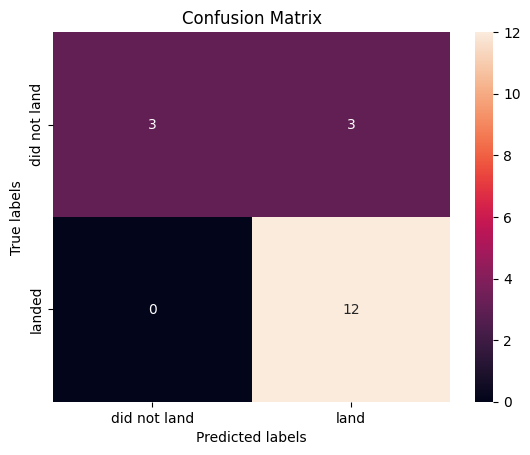

In [ ]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}

In [ ]:
svm = SVC()
grid_search = GridSearchCV(svm, parameters, cv=10)
svm_cv = grid_search.fit(X_train, Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [ ]:
svm_cv.score(X_test, Y_test)

0.8333333333333334

We can plot the confusion matrix


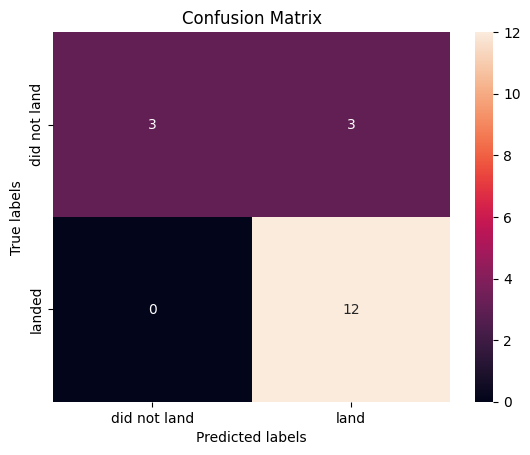

In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2 * n for n in range(1, 10)],
              'max_features': ['sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
grid_search = GridSearchCV(tree, parameters, cv=10)
tree_cv = grid_search.fit(X_train, Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8767857142857144


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [ ]:
tree_cv.score(X_test, Y_test)

0.8888888888888888

We can plot the confusion matrix


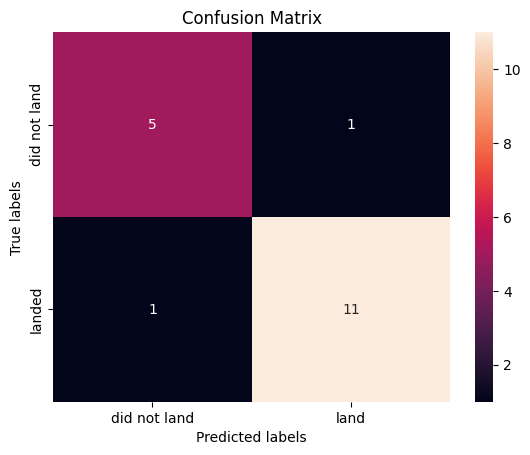

In [ ]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
grid_search = GridSearchCV(KNN, parameters, cv=10)
knn_cv = grid_search.fit(X_train, Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [ ]:
knn_cv.score(X_test, Y_test)

0.8333333333333334

We can plot the confusion matrix


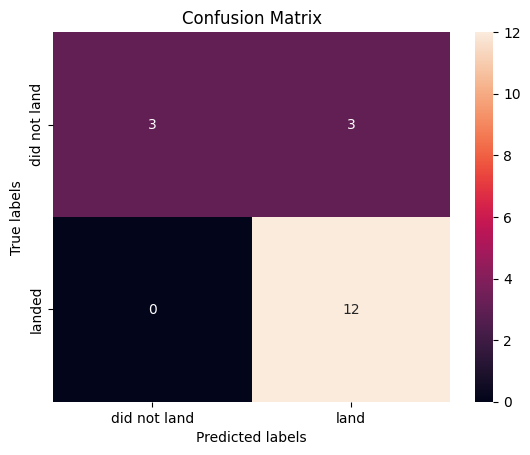

In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [ ]:
Evaluation = {'Algorithm': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
              'Best Score': [logreg_cv.best_score_, svm_cv.best_score_, tree_cv.best_score_,  knn_cv.best_score_]}

df = pd.DataFrame(Evaluation)
display(df)

,Algorithm,Best Score
0,Logistic Regression,0.846429
1,SVM,0.848214
2,Decision Tree,0.876786
3,KNN,0.848214


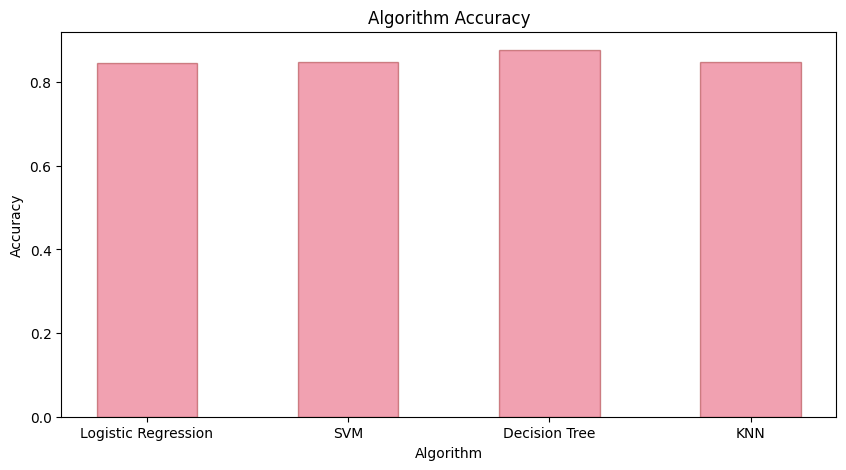

In [ ]:
# Plotting the bar graph
plt.figure(figsize=(10, 5))
plt.bar(df['Algorithm'], df['Best Score'], width = 0.5, color='#DC143C',
        alpha=0.4, edgecolor='#8B0000')

plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Algorithm Accuracy")
plt.show()

### Flight Number VS Launch Site

In [ ]:
pivot_table = pd.pivot_table(data, index='LaunchSite', columns='FlightNumber', aggfunc='size', fill_value=0)
pivot_table

FlightNumber,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
LaunchSite,,,,,,,,,,,,,,,,,,,,,
CCAFS SLC 40,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,1,1
KSC LC 39A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
VAFB SLC 4E,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cross_tab = pd.crosstab(data['LaunchSite'], data['FlightNumber'], dropna=False)
sum_by_launchsite = cross_tab.sum(axis=1)

sum_by_launchsite

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
dtype: int64

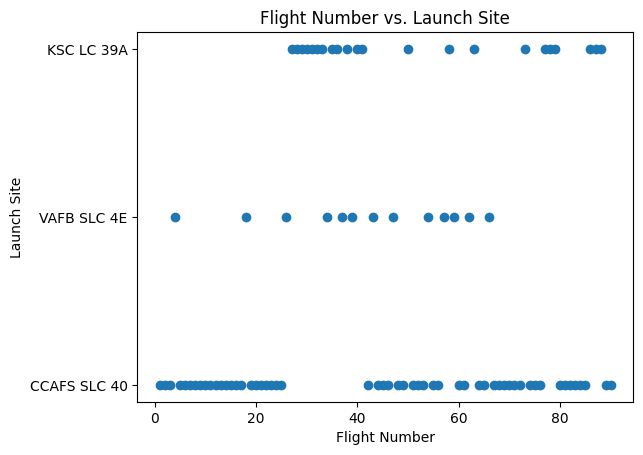

In [ ]:
plt.scatter(data['FlightNumber'], data['LaunchSite'])

plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.title('Flight Number vs. Launch Site')

plt.show()

### PayloadMass vs. Launch Site

In [ ]:
min_max_data = data.groupby('LaunchSite')['PayloadMass'].agg(['min', 'max']).reset_index()

min_max_data

,LaunchSite,min,max
0,CCAFS SLC 40,350.0,15600.0
1,KSC LC 39A,2490.0,15600.0
2,VAFB SLC 4E,475.0,9600.0


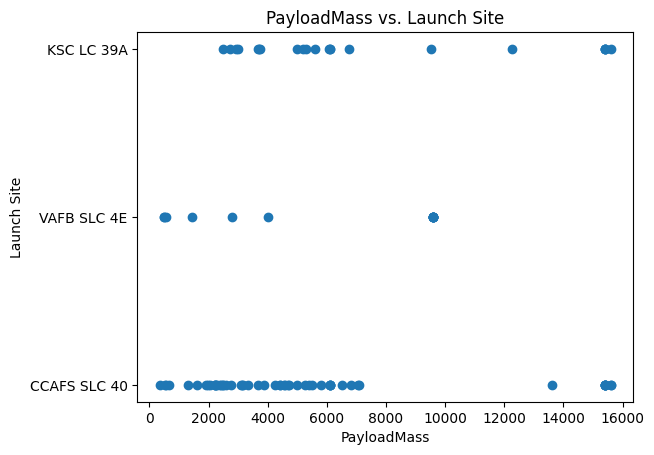

In [ ]:
plt.scatter(data['PayloadMass'], data['LaunchSite'])

plt.xlabel('PayloadMass')
plt.ylabel('Launch Site')
plt.title('PayloadMass vs. Launch Site')

plt.show()

### Success Rate by Orbit Type

In [ ]:
success_rate = data.groupby('Orbit')['Class'].mean()
display(success_rate)

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

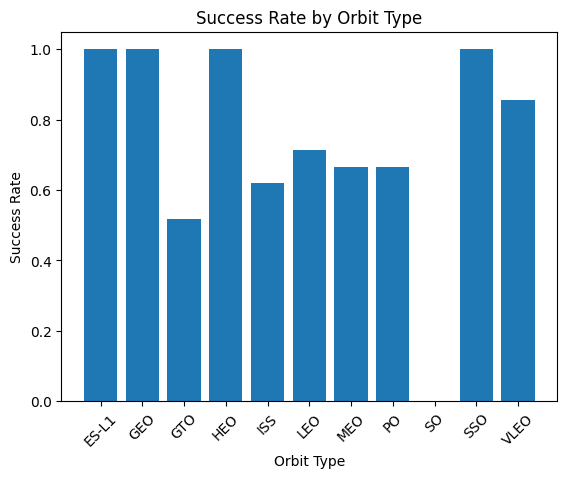

In [ ]:
# Create the bar chart
plt.bar(success_rate.index, success_rate)

# Set labels and title
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.title('Success Rate by Orbit Type')

plt.xticks(rotation=45)

plt.show()

### Flight Number vs. Orbit

In [ ]:
pivot_table = pd.pivot_table(data, index='Orbit', columns='FlightNumber', aggfunc='size', fill_value=0)
pivot_table

FlightNumber,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
Orbit,,,,,,,,,,,,,,,,,,,,,
ES-L1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GEO,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
GTO,0,0,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
HEO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ISS,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LEO,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
MEO,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
PO,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cross_tab = pd.crosstab(data['Orbit'], data['FlightNumber'], dropna=False)
sum_by_launchsite = cross_tab.sum(axis=1)

sum_by_launchsite

Orbit
ES-L1     1
GEO       1
GTO      27
HEO       1
ISS      21
LEO       7
MEO       3
PO        9
SO        1
SSO       5
VLEO     14
dtype: int64

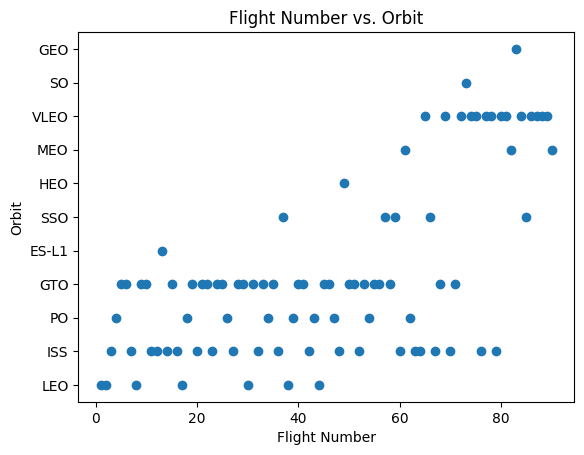

In [ ]:
plt.scatter(data['FlightNumber'], data['Orbit'])

plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.title('Flight Number vs. Orbit')

plt.show()

### PayloadMass vs. Orbit Type

In [ ]:
min_max_data = data.groupby('Orbit')['PayloadMass'].agg(['min', 'max']).reset_index()

min_max_data

,Orbit,min,max
0,ES-L1,570.000000,570.000000
1,GEO,6104.959412,6104.959412
2,GTO,3000.000000,7076.000000
3,HEO,350.000000,350.000000
4,ISS,677.000000,12259.000000
5,LEO,525.000000,6104.959412
6,MEO,3681.000000,4400.000000
7,PO,500.000000,9600.000000
8,SO,6104.959412,6104.959412
9,SSO,475.000000,4000.000000


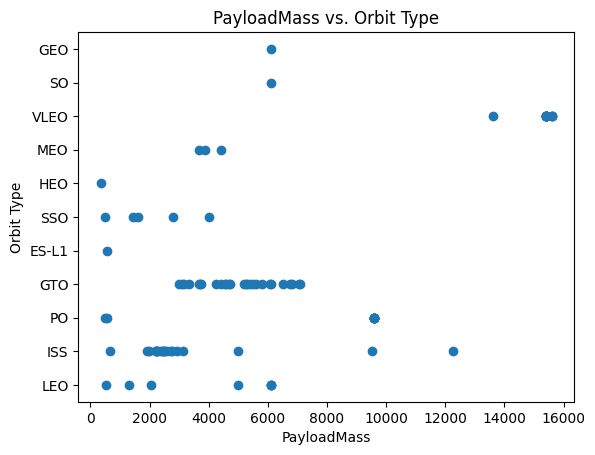

In [ ]:
plt.scatter(data['PayloadMass'], data['Orbit'])

plt.xlabel('PayloadMass')
plt.ylabel('Orbit Type')
plt.title('PayloadMass vs. Orbit Type')

plt.show()

### Launch Success Yearly Trend

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

yearly_avg_success_rate = data.groupby('Year')['Class'].mean()
yearly_avg_success_rate

Year
2010    0.000000
2012    0.000000
2013    0.000000
2014    0.333333
2015    0.333333
2016    0.625000
2017    0.833333
2018    0.611111
2019    0.900000
2020    0.842105
Name: Class, dtype: float64

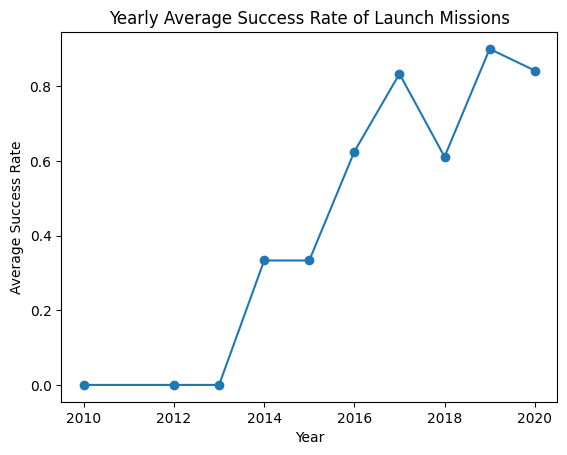

In [ ]:
plt.plot(yearly_avg_success_rate.index, yearly_avg_success_rate, marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.title('Yearly Average Success Rate of Launch Missions')

# Display the chart
plt.show()

In [ ]:
cross_tab = pd.crosstab(data['BoosterVersion'], data['Class'], dropna=False)
cross_tab
# BoosterVersionsuccess = cross_tab.sum(axis=1)

# BoosterVersionsuccess

Class,0,1
BoosterVersion,,
Falcon 9,30,60


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
